#### **1. Análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
Datos = pd.read_csv('C:/Users/heart_cleveland_upload.csv')

In [9]:
Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [10]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [11]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


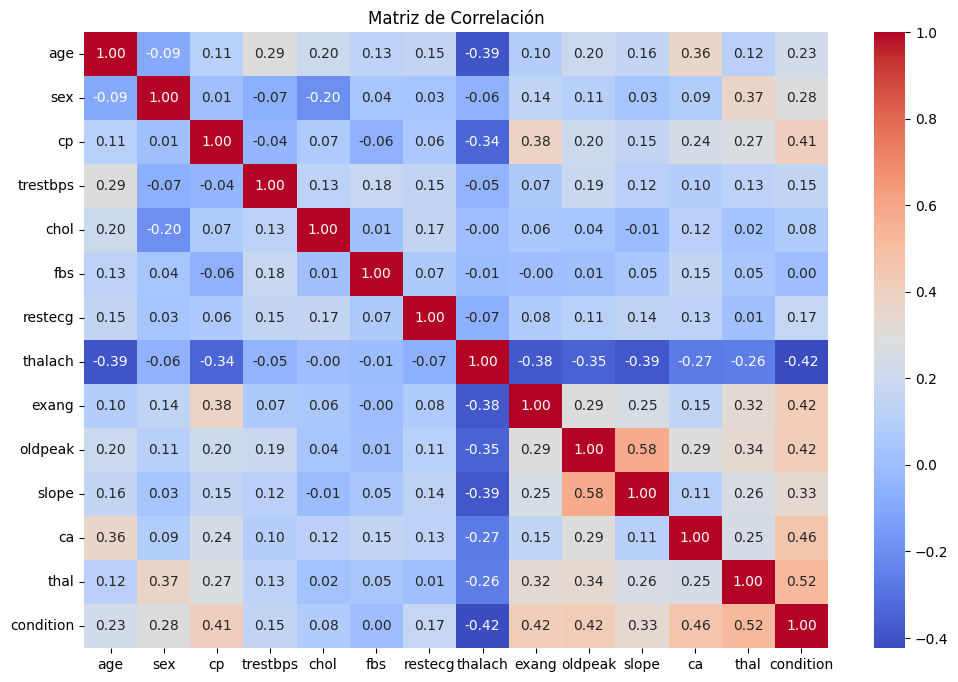

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(Datos.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

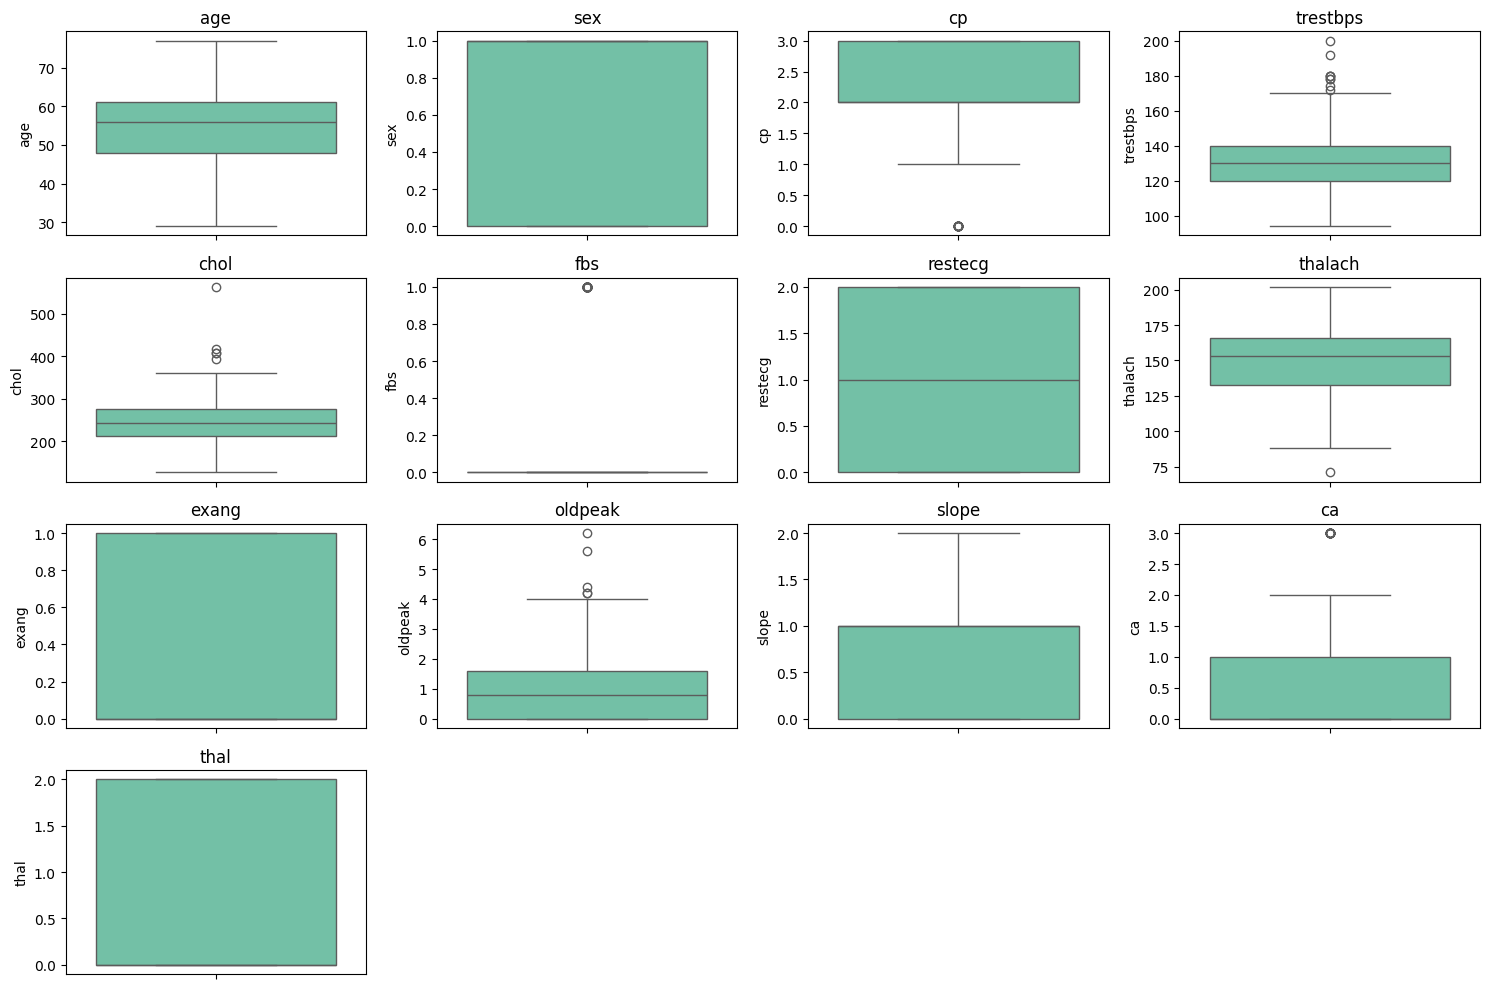

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(Datos.columns[:-1]):  # Excluir la variable objetivo
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=Datos[col],color='#66CDAA')
    plt.title(col)
plt.tight_layout()
plt.show()

#### **2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [14]:
variables_modelo = [
    'age',         # Edad
    'trestbps',    # Presión arterial en reposo
    'chol',        # Colesterol sérico
    'thalach',     # Frecuencia cardíaca máxima alcanzada
    'exang',       # Angina inducida por ejercicio (1=sí, 0=no)
    'oldpeak',     # Depresión del ST inducida por ejercicio
    'ca',          # Número de vasos principales (0-3)
    'thal'         # Thalassemia (3=normal, 6=defecto, 7=reversible)
    ]

In [15]:
# 3. Filtrar atípicos con límites médicos
limites = {
    'age': (30, 90),
    'trestbps': (90, 180),
    'chol': (125, 300),
    'thalach': (60, 200),
    'oldpeak': (0, 4)
}

for col, (min_val, max_val) in limites.items():
    n_atipicos = ((Datos[col] < min_val) | (Datos[col] > max_val)).sum()
    print(f"Atípicos en {col}: {n_atipicos}")
    Datos = Datos[(Datos[col] >= min_val) & (Datos[col] <= max_val)]



Atípicos en age: 1
Atípicos en trestbps: 2
Atípicos en chol: 44
Atípicos en thalach: 0
Atípicos en oldpeak: 4


In [16]:
X = Datos[variables_modelo]
y = Datos['condition']

In [17]:
print("Variables predictoras usadas:", X.columns.tolist())
print("\nTotal de muestras después de filtrar:", len(X))

Variables predictoras usadas: ['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

Total de muestras después de filtrar: 246


In [18]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        246 non-null    int64  
 1   sex        246 non-null    int64  
 2   cp         246 non-null    int64  
 3   trestbps   246 non-null    int64  
 4   chol       246 non-null    int64  
 5   fbs        246 non-null    int64  
 6   restecg    246 non-null    int64  
 7   thalach    246 non-null    int64  
 8   exang      246 non-null    int64  
 9   oldpeak    246 non-null    float64
 10  slope      246 non-null    int64  
 11  ca         246 non-null    int64  
 12  thal       246 non-null    int64  
 13  condition  246 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 28.8 KB


#### **3. Características más relevantes para entrenar el modelo utilizando selección de características.**

- Característica de interes:

  - enfermedad cardiaca: si la persona presenta enfermedad cardiaca  (0 = Sin enfermedad cardiaca - 1 = con enfermedad cardiaca)
  - Predecir si una persona puede tener enfermedad cardiaca

In [19]:
# Total de personas con enfermedad cardiaca

Datos['condition'].value_counts()

condition
0    135
1    111
Name: count, dtype: int64

#### **4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.**

In [20]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Condition 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [21]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
22    34    1   0       118   182    0        2      174      0      0.0   
172   65    1   3       120   177    0        0      140      0      0.4   
44    54    0   1       132   288    1        2      159      1      0.0   
30    59    1   1       140   221    0        0      164      1      0.0   
103   57    1   2       128   229    0        2      150      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
118   51    1   2       100   222    0        0      143      1      1.2   
194   61    1   3       138   166    0        2      125      1      3.6   
115   53    1   2       130   246    1        2      173      0      0.0   
23    74    0   1       120   269    0        2      121      1      0.2   
149   41    0   2       112   268    0        2      172      1      0.0   

     slope  ca  thal  
22       0   0     0  
172      0   0     2  
44       0   1    

In [22]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
59    44    1   1       120   263    0        0      173      0      0.0   
164   67    1   3       120   237    0        0       71      0      1.0   
127   50    1   2       129   196    0        0      163      0      0.0   
106   56    1   2       130   256    1        2      142      1      0.6   
268   48    1   3       122   222    0        2      186      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
198   60    1   3       130   206    0        2      132      1      2.4   
107   54    1   2       125   273    0        2      152      0      0.5   
196   61    1   3       140   207    0        2      138      1      1.9   
34    57    1   1       124   261    0        0      141      0      0.3   
108   54    1   2       120   258    0        2      147      0      0.4   

     slope  ca  thal  
59       0   0     2  
164      1   0     0  
127      0   0    

#### **5. Entrenar el modelo configurando los diferentes hiperparámetros.**

In [23]:
#Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear",
                                      penalty='l2',
                                      class_weight='balanced', # Para manejar desbalance de clases
                                      max_iter=1000) # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [39]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
59,44,1,1,120,263,0,0,173,0,0.0,0,0,2
164,67,1,3,120,237,0,0,71,0,1.0,1,0,0
127,50,1,2,129,196,0,0,163,0,0.0,0,0,0
106,56,1,2,130,256,1,2,142,1,0.6,1,1,1
268,48,1,3,122,222,0,2,186,0,0.0,0,0,0
114,53,1,2,130,197,1,2,152,0,1.2,2,0,0
10,59,1,0,170,288,0,2,159,0,0.2,1,0,2
122,51,0,2,130,256,0,2,149,0,0.5,0,0,0
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0
236,56,1,3,125,249,1,2,144,1,1.2,1,1,0


In [24]:
print (Prediccion)

[0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0
 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1]


#### **6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.**

In [25]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.75      0.64      0.69        28

    accuracy                           0.74        62
   macro avg       0.74      0.73      0.74        62
weighted avg       0.74      0.74      0.74        62



##### **7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

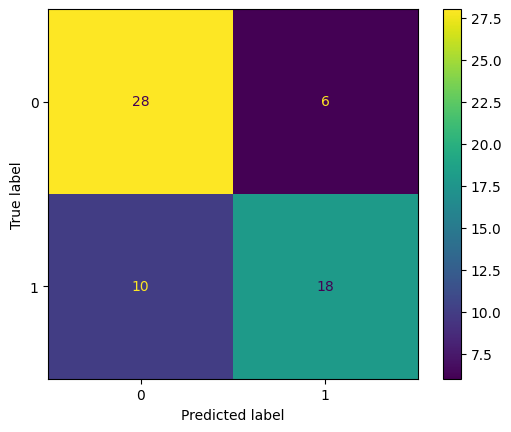

In [26]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

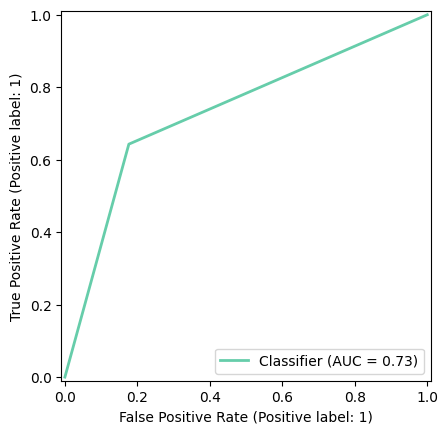

In [27]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion, color='#66CDAA', linewidth=2)
plt.show()

#### **8. Interpretación, análisis y documentación de resultados obtenidos.**

Según el desempeño del modelo se puede describir:
- Precisión: Para la clase "condition" es 0,75, equivalente al 75% de las instancias predichas con enfermedad cardiaca eran realmente con enfermedad cardiaca.
- Recall: El modelo detecta correctamente al 64.3% de los enfermos reales.
- F1 Score:el modelo identificó correctamente al 69% lo que refleja un buen equilibro entre Precisión y Recall.

De la matriz de confusión se interpreta:
- Verdaderos negativos: Pacientes sin enfermedad correctamente clasificados. 28
- Verdaderos positivos: Pacientes sanos erróneamente diagnosticados como enfermos. 6
- Falsos positivos: Pacientes enfermos no detectados (el error más grave). 10
- Falsos negativos: Pacientes enfermos correctamente identificados. 18

De la curva de precisión del modelo se puede interpretar:
- El modelo tiene un 73% de probabilidad de distinguir correctamente entre pacientes con enfermedad cardíaca (clase 1) y sanos (clase 0) en todos los umbrales de clasificación.
 